## Machine Learning

### Table of Content

#### 1. Importing libraries and data

#### 2. Data Prep for Regression Analysis

#### 3. Regression Analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/henning/Projects/Hotel_Booking'

In [4]:
H1 = pd.read_csv(os.path.join(path, 'Data', 'Raw', 'H1.csv'))

### 2. Data Prep for Regression Analysis

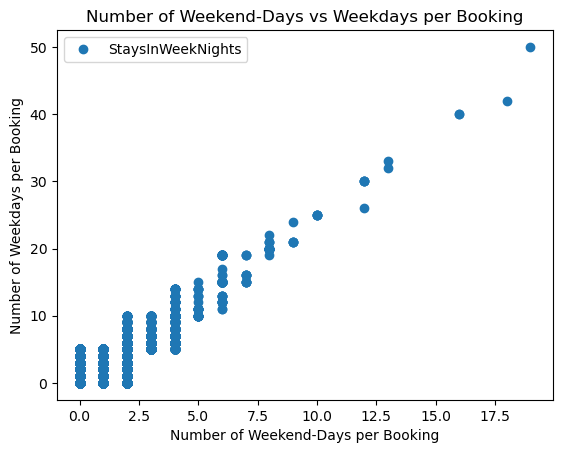

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

H1.plot(x = 'StaysInWeekendNights', y='StaysInWeekNights',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Weekend-Days vs Weekdays per Booking')  
plt.xlabel('Number of Weekend-Days per Booking')  
plt.ylabel('Number of Weekdays per Booking')  
plt.show()

### Hypothesis

"The higher the Number of Weekend-days, the higher number of weekdays per booking."

Because in 6.2 I couldn't find a strong correlation in the EDA, I am using the regression model for the relationship between the weekend and weekdays, even though it will not lead to an interesting insight to the booking behaviour of guests. Nevertheless I wanted to see how the regression line looks like.

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = H1['StaysInWeekendNights'].values.reshape(-1,1)
y = H1['StaysInWeekNights'].values.reshape(-1,1)

In [7]:
X

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]])

In [8]:
y

array([[ 0],
       [ 0],
       [ 1],
       ...,
       [10],
       [10],
       [10]])

In [9]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression Analysis

In [10]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [11]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

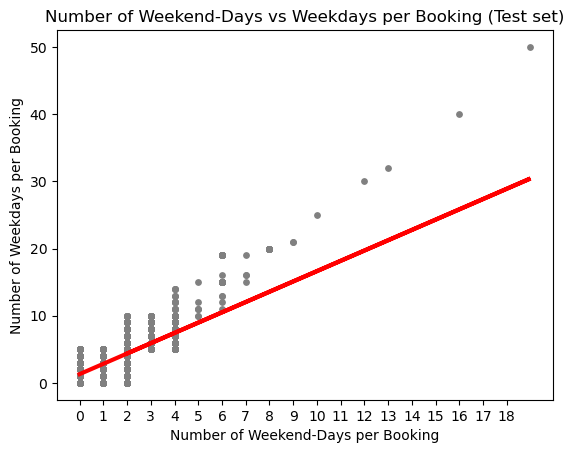

In [13]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Weekend-Days vs Weekdays per Booking (Test set)')
plot_test.xlabel('Number of Weekend-Days per Booking')
plot_test.ylabel('Number of Weekdays per Booking')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plot_test.show()

The predicted line doesn't fit perfectly. Bookings with just 1 or 2 weekend-days have proportionally more weekdays, warping the regression line lower, making it unfit to predict the number of weekdays in bookings with high number of weekend-days.

In [14]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [15]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.53238264]]
Mean squared error:  2.9323342514336024
R2 score:  0.5226038547409374


In [16]:
y_predicted

array([[1.30837774],
       [1.30837774],
       [1.30837774],
       ...,
       [1.30837774],
       [4.37314302],
       [4.37314302]])

In [17]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,1.308378
1,3,1.308378
2,4,1.308378
3,1,1.308378
4,1,1.308378
5,1,2.840760
6,2,1.308378
7,0,2.840760
8,1,1.308378
9,0,2.840760


### Final Thoughts

Because the regression line performs worse in higher numbers, it shows that guests who book short trips with only 1 oder 2 weekends (2 to 4 weekend-days), have disproportionately less days during the week. This could be because the hotel has a of weekend trips.
Guest that stay for weeks, their booking is closer to the regula